In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import json
import os
import glob

In [30]:
# Path to the directory containing JSON results
# folder_path = '/home/sunhongli/workspace/MedLongContextEval/needlehaystack/result_pulse_20bv12_159k_zh_query_kg_v1/results'
# folder_path = '/home/sunhongli/workspace/MedLongContextEval/needlehaystack/result_chatgpt_20bv12_159k_zh_query_kg_v1/results'
folder_path = '/home/sunhongli/workspace/MedLongContextEval/needlehaystack/result_gpt4_20bv12_159k_zh_query_kg_v1/results'

# Using glob to find all json files in the directory
json_files = glob.glob(f"{folder_path}/*.json")

# List to hold the data
data = []

# Iterating through each file and extract the 3 columns we need
for file in json_files:
    with open(file, 'r') as f:
        json_data = json.load(f)
        # Extracting the required fields
        document_depth = json_data.get("depth_percent", None)
        context_length = json_data.get("context_length", None)
        score = json_data.get("score", None)
        # Appending to the list
        data.append({
            "Document Depth": document_depth,
            "Context Length": context_length,
            "Score": score
        })

# Creating a DataFrame
df = pd.DataFrame(data)

print (df.head())
print (f"You have {len(df)} rows")

Empty DataFrame
Columns: []
Index: []
You have 0 rows


In [31]:
pivot_table = pd.pivot_table(df, values='Score', index=['Document Depth', 'Context Length'], aggfunc='mean').reset_index() # This will aggregate
pivot_table = pivot_table.pivot(index="Document Depth", columns="Context Length", values="Score") # This will turn into a proper pivot
# pivot_table.iloc[:5, :5]
pivot_table

KeyError: 'Score'

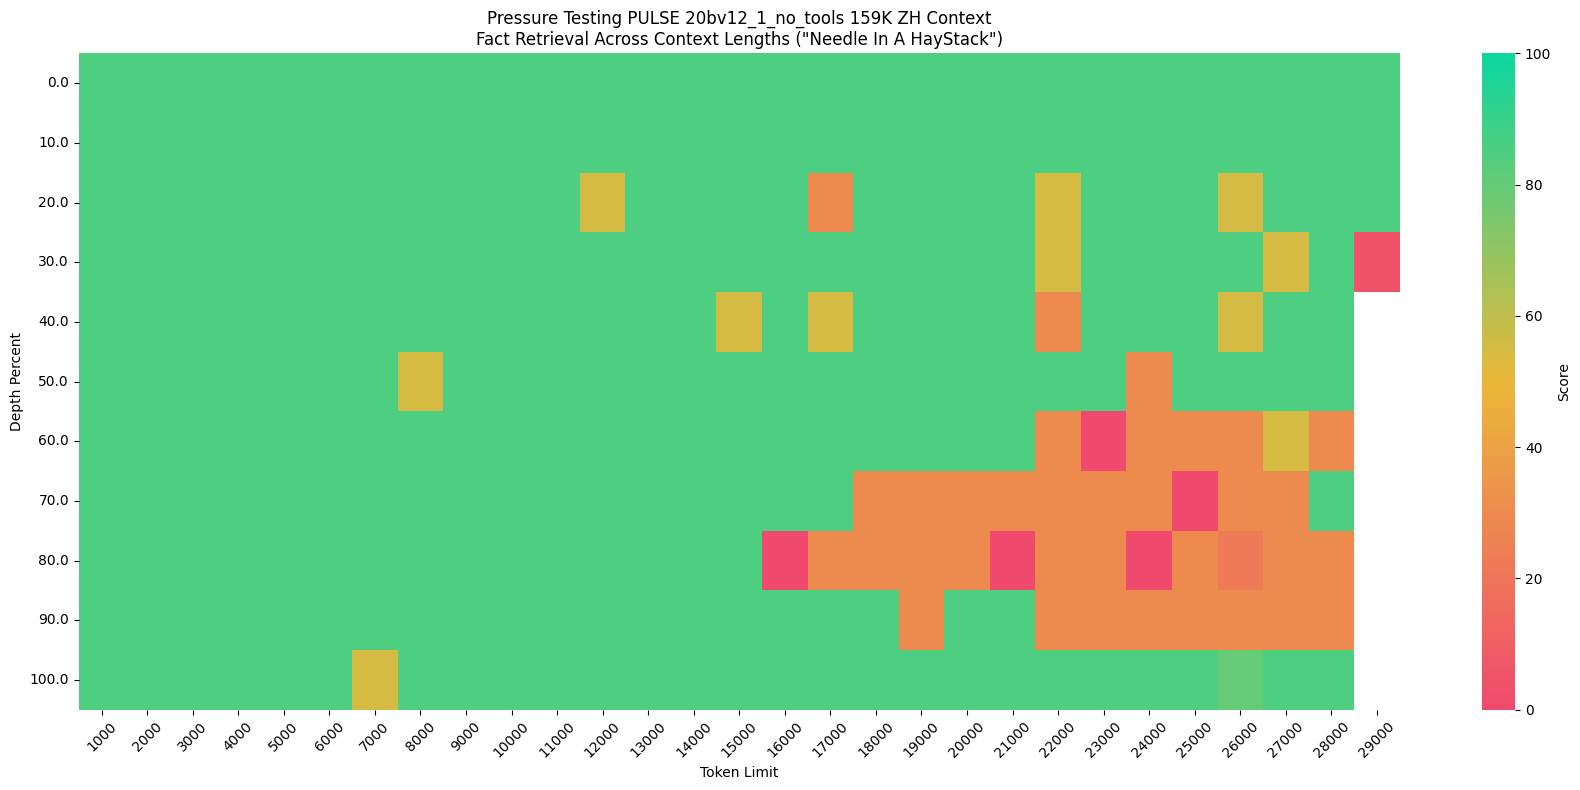

In [ ]:
# Create a custom colormap. Go to https://coolors.co/ and pick cool colors
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#F0496E", "#EBB839", "#0CD79F"])

# Create the heatmap with better aesthetics
plt.figure(figsize=(17.5, 8))  # Can adjust these dimensions as needed
sns.heatmap(
    pivot_table,
    # annot=True,
    fmt="g",
    cmap=cmap,
    cbar_kws={'label': 'Score'},
    vmin=0,
    vmax=100,
)

# More aesthetics
# plt.title('Pressure Testing PULSE 20bv12_1_no_tools 32K Context\nFact Retrieval Across Context Lengths ("Needle In A HayStack")')  # Adds a title
plt.title('Pressure Testing PULSE 20bv12_1_no_tools 159K ZH Context\nFact Retrieval Across Context Lengths ("Needle In A HayStack")')  # Adds a title
plt.xlabel('Token Limit')  # X-axis label
plt.ylabel('Depth Percent')  # Y-axis label
plt.xticks(rotation=45)  # Rotates the x-axis labels to prevent overlap
plt.yticks(rotation=0)  # Ensures the y-axis labels are horizontal
plt.tight_layout()  # Fits everything neatly into the figure area

# Show the plot
plt.show()